# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re
import nltk
nltk.download('stopwords')
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mshiv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading Dataset 

In [3]:
df = pd.read_csv(r"E:\Data Science Projects\Project Files\Capestone 1 - Hate Speech detection\twitter_data.csv")

In [4]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
df.tail()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies
24782,25296,3,0,0,3,2,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...


# Data Preparation

In [6]:
df['labels'] = df['class'].map({0:"Hate Speech Detected",1:"Offensive language detected",2:"NO hate and offensive speech"})

In [7]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,NO hate and offensive speech
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language detected
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language detected
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language detected
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language detected


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
 7   labels              24783 non-null  object
dtypes: int64(6), object(2)
memory usage: 1.5+ MB


In [9]:
num_data=[x for x in df.columns if df[x].dtypes!='object']

In [10]:
cat_data=[x for x in df.columns if df[x].dtypes=='object']

In [11]:
num_data

['Unnamed: 0',
 'count',
 'hate_speech',
 'offensive_language',
 'neither',
 'class']

In [12]:
num_data.remove('Unnamed: 0')

In [13]:
num_data

['count', 'hate_speech', 'offensive_language', 'neither', 'class']

In [14]:
cat_data

['tweet', 'labels']

## Visualization

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

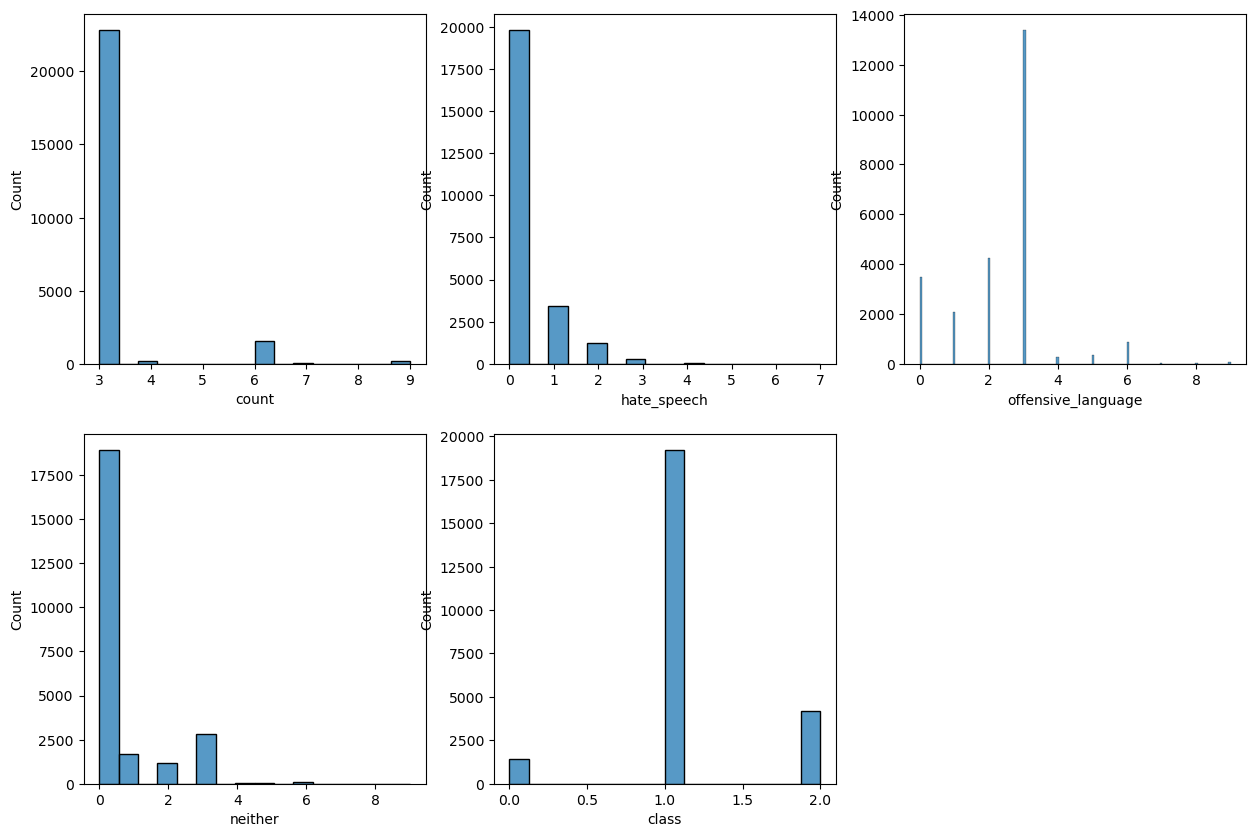

In [16]:
plt.figure(figsize=(15,10))

for i , col in enumerate(num_data):
    plt.subplot(2,3,i+1)
    sns.histplot(data=df,x=col)
plt.show()

### KDE Plot

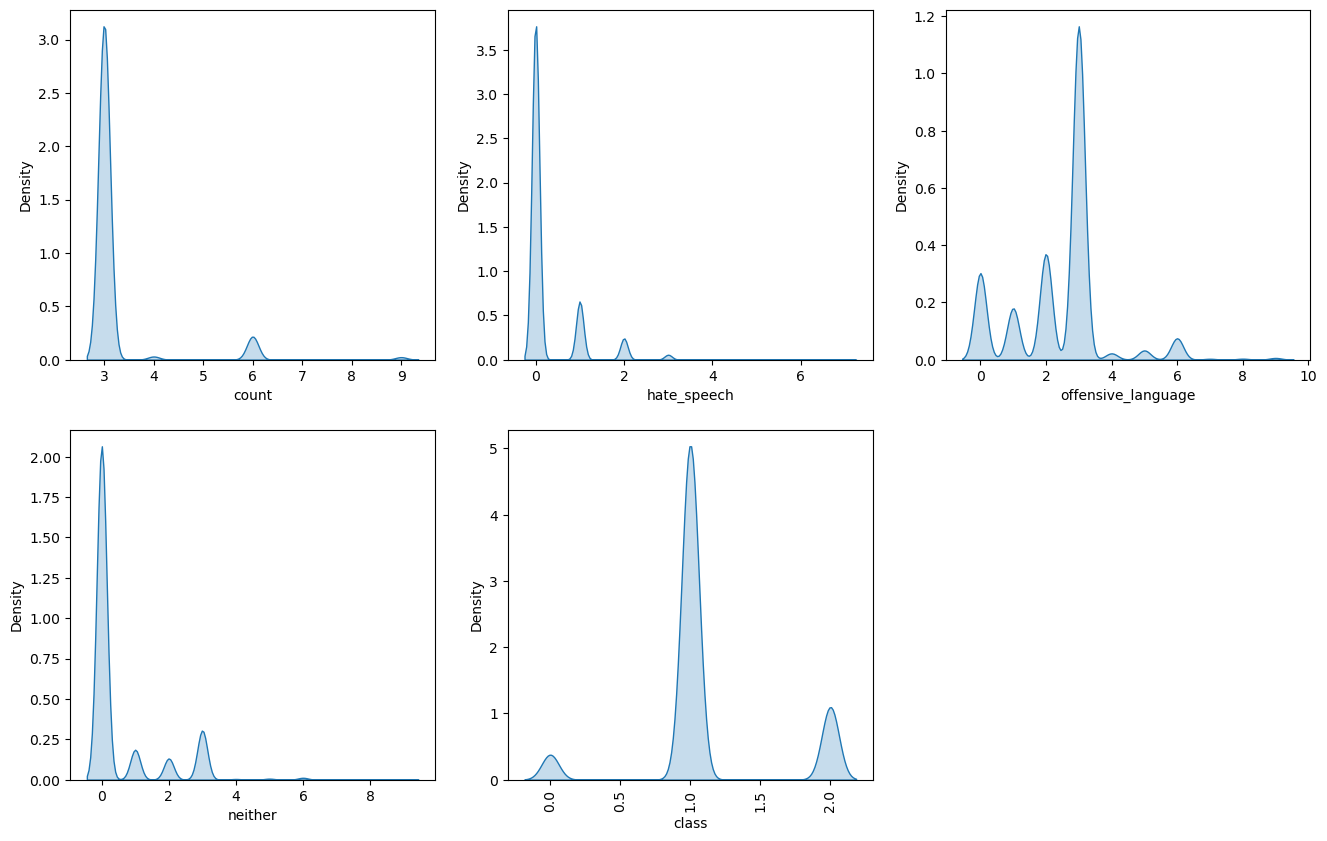

In [17]:
plt.figure(figsize=(16,10))

for i , col in enumerate(num_data):
    plt.subplot(2,3,i+1)
    sns.kdeplot(data=df,x=col,fill=True)
plt.xticks(rotation = 90)
plt.show()

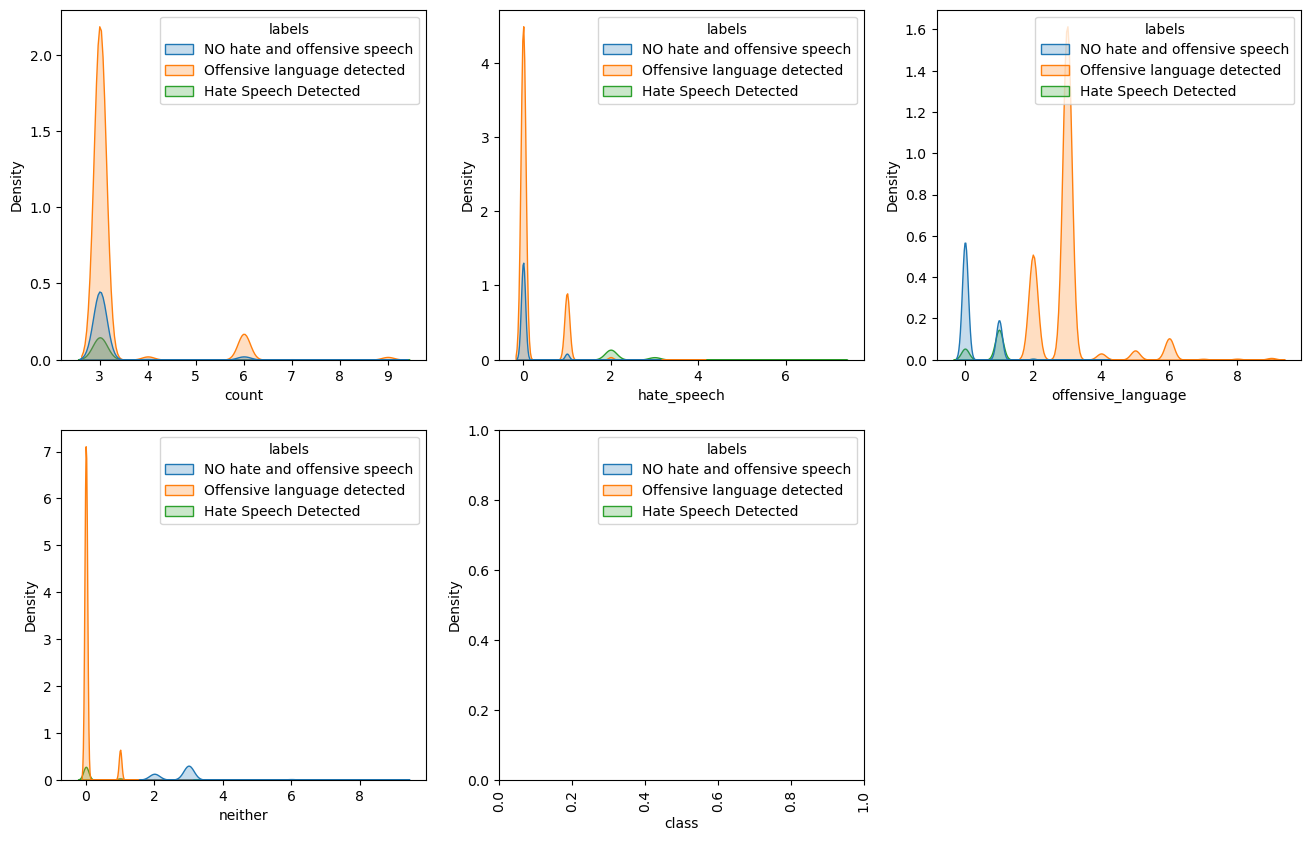

In [18]:
plt.figure(figsize=(16,10))

for i , col in enumerate(num_data):
    plt.subplot(2,3,i+1)
    sns.kdeplot(data=df,x=col,hue=df['labels'],fill=True)
plt.xticks(rotation = 90)
plt.show()

### Boxen Plot

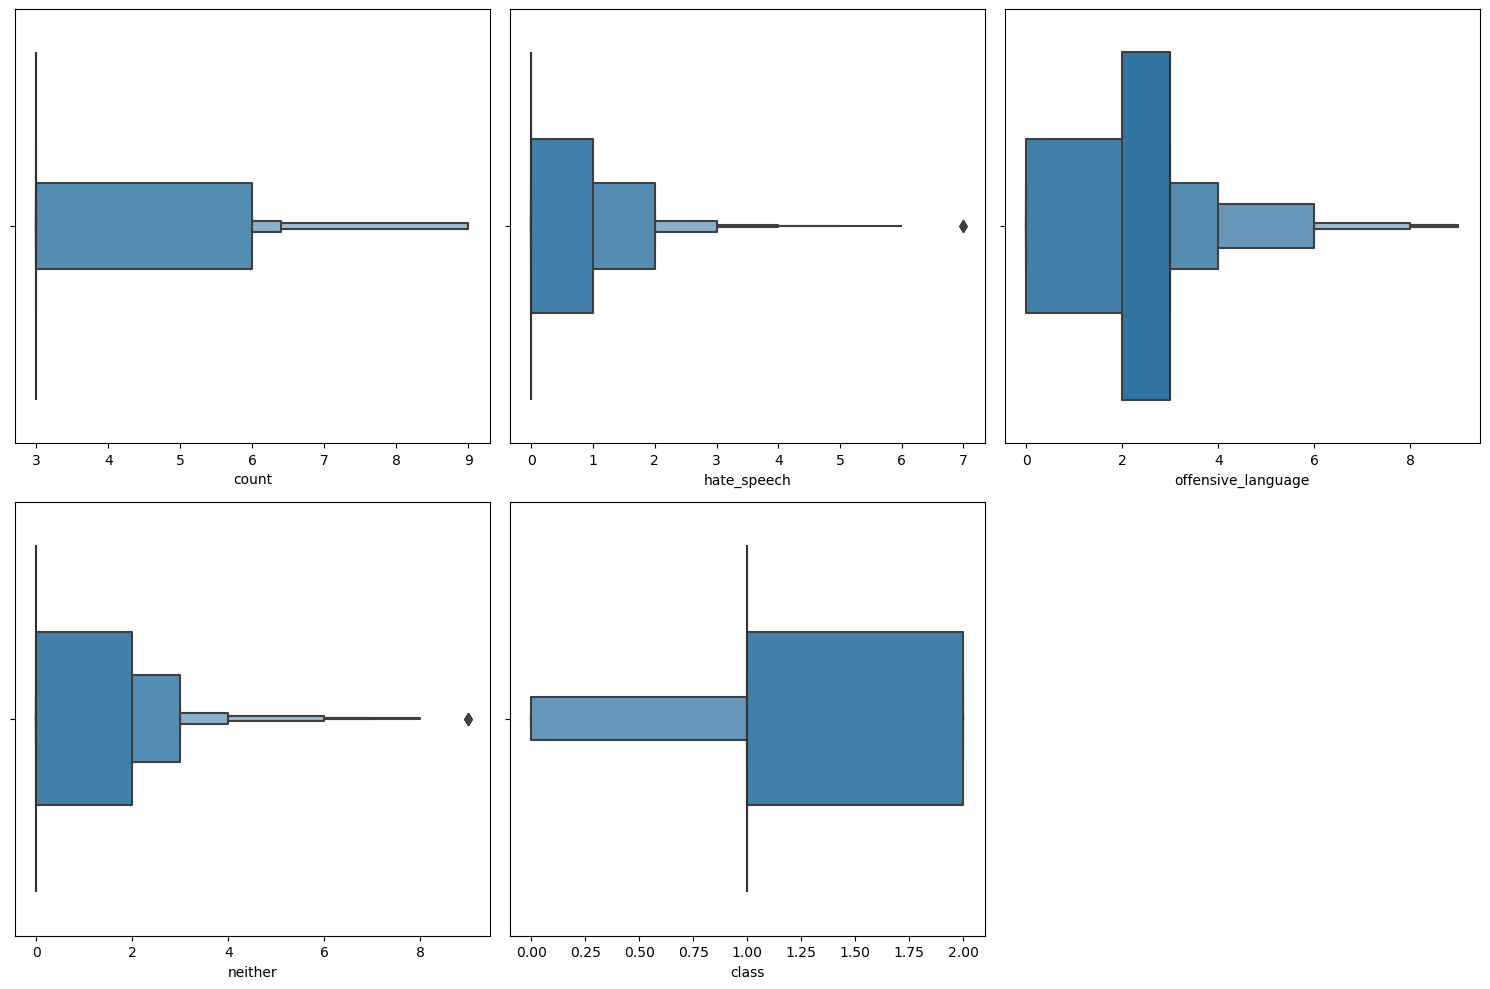

In [19]:
plt.figure(figsize=(15,10))


for i , col in enumerate(num_data):
    plt.subplot(2,3,i+1)
    sns.boxenplot(data=df,x=col)
plt.tight_layout()
plt.show()

### Box Plot

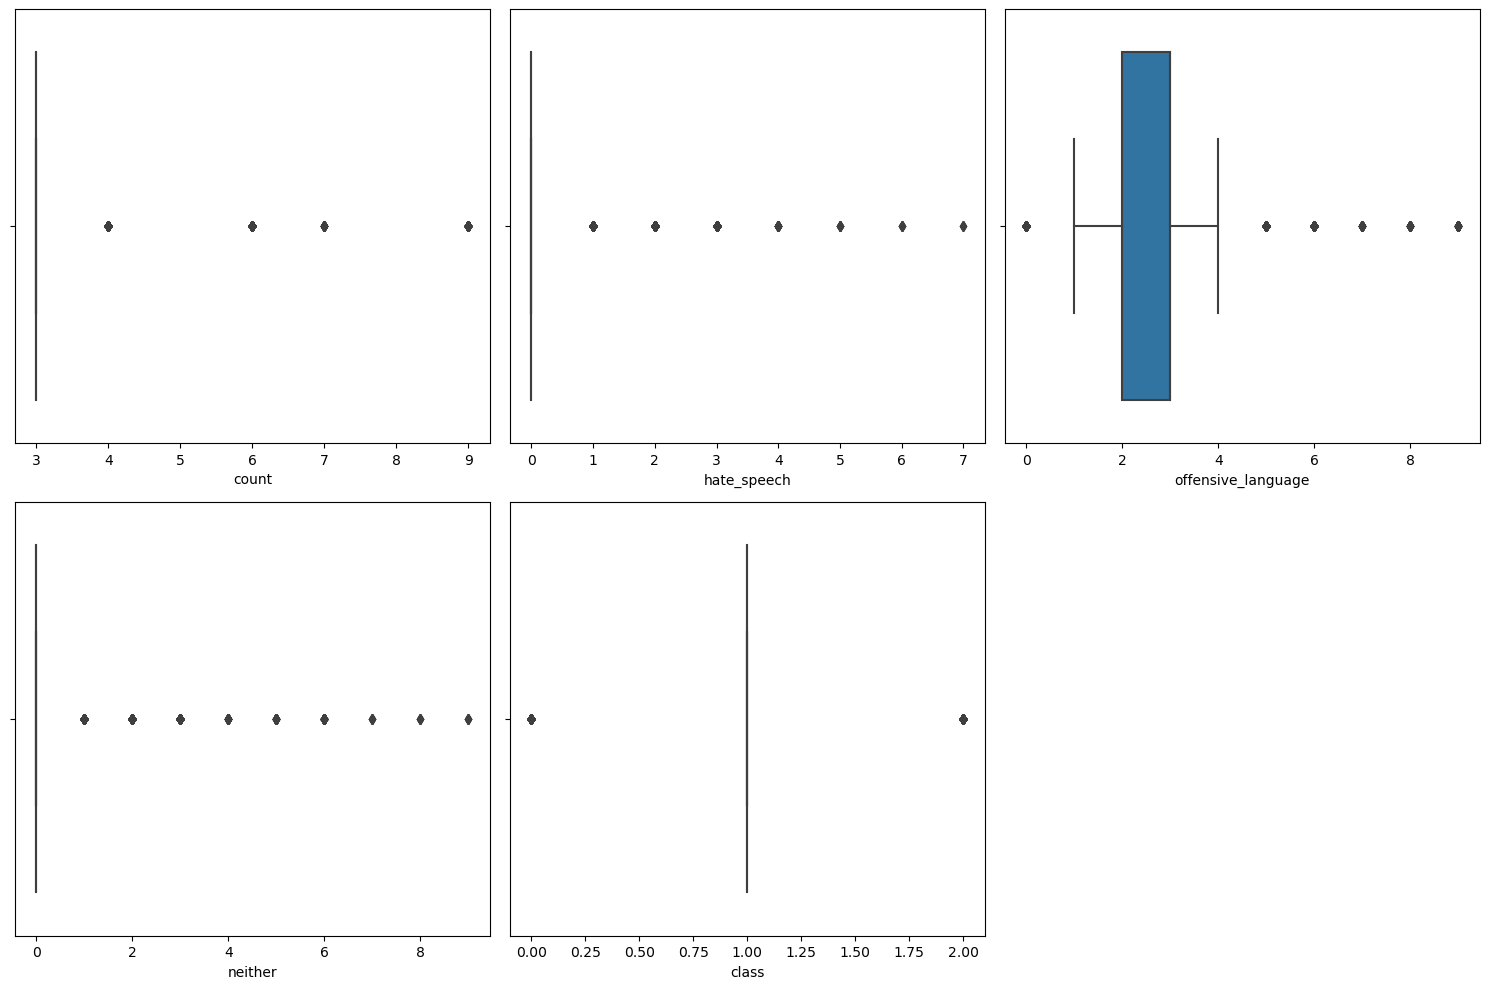

In [20]:
plt.figure(figsize=(15,10))


for i , col in enumerate(num_data):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=df,x=col)
plt.tight_layout()
plt.show()

### Pair Plot

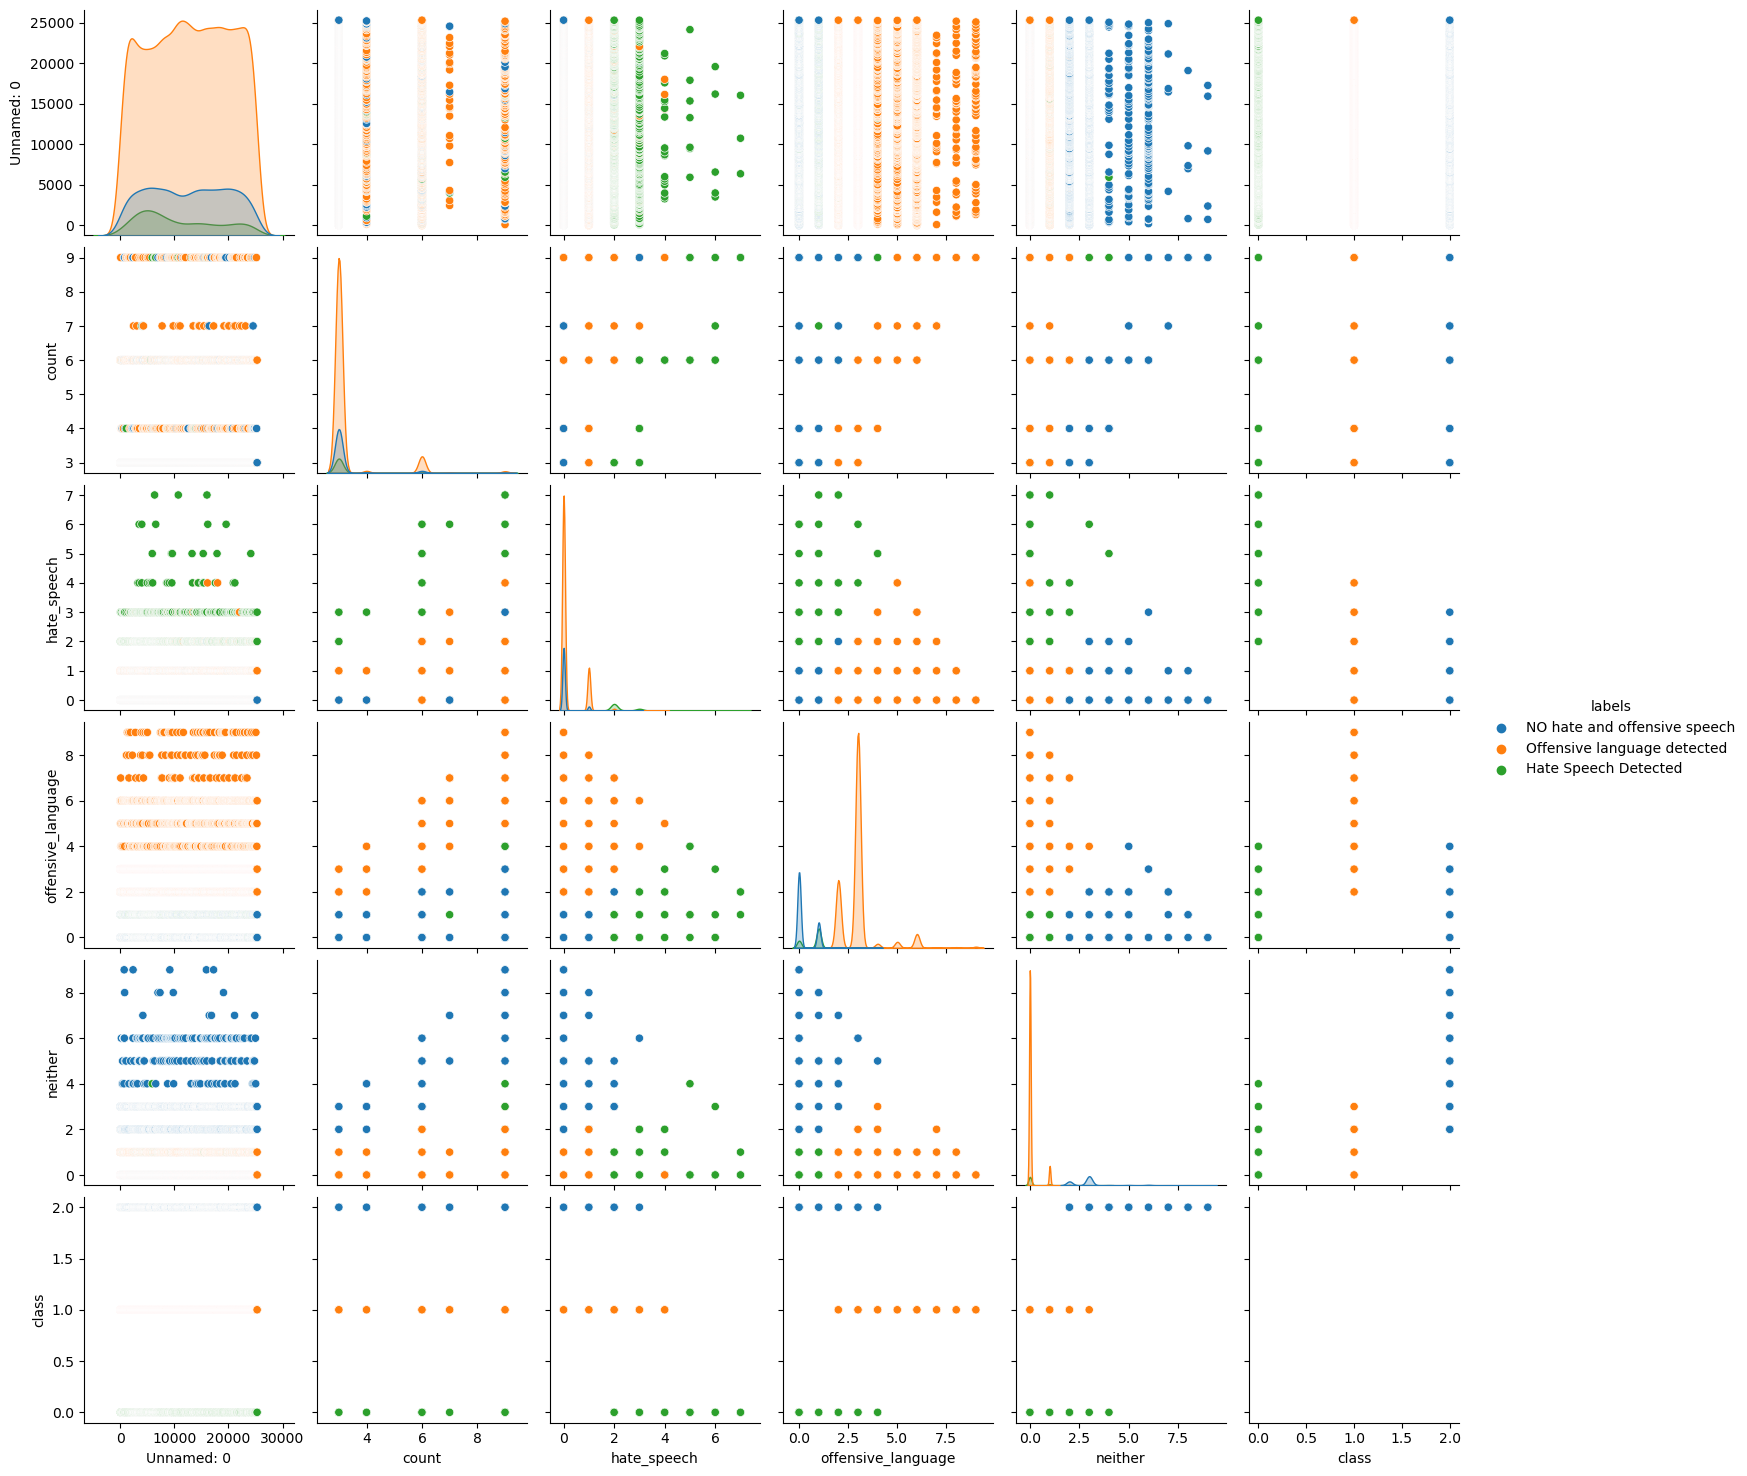

In [21]:
sns.pairplot(df,hue='labels')
plt.show()

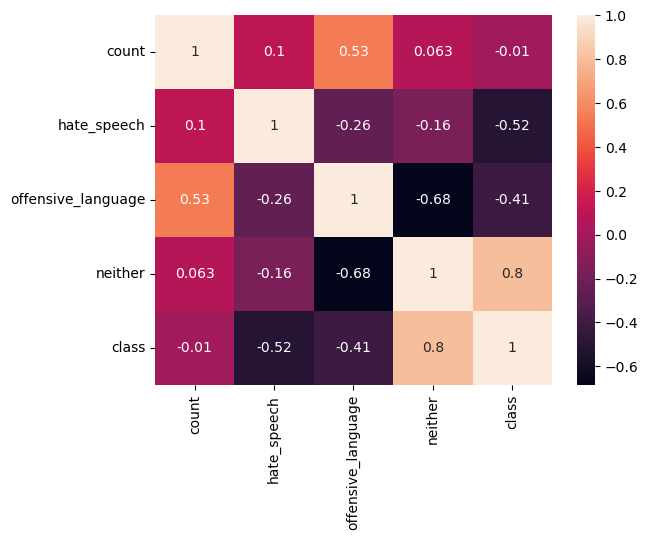

In [22]:
sns.heatmap(df[num_data].corr(),annot=True)
plt.show()

### Pie Chart

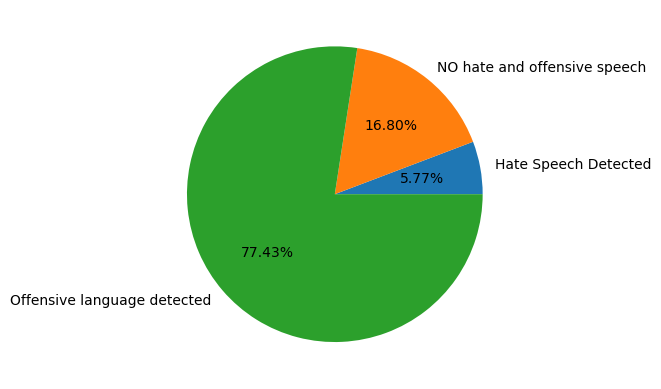

In [23]:
h=df.groupby('labels')['labels'].count()
plt.pie(h, labels=h.index, autopct='%.2f%%')
plt.show()

### Donut Chart 

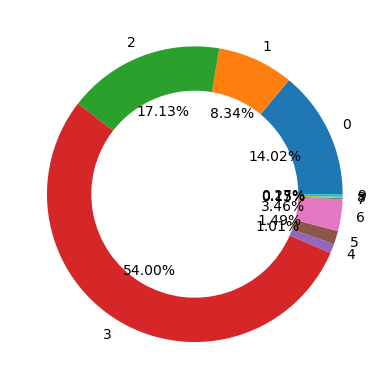

In [24]:
i=df.groupby('offensive_language')['offensive_language'].count()
plt.pie(i, labels=i.index, autopct='%.2f%%', wedgeprops=dict(width=0.3))
plt.show()

### Hist plot

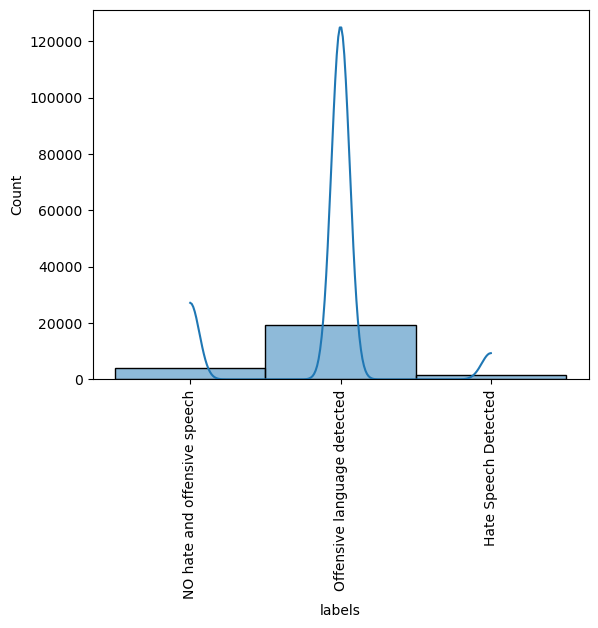

In [25]:
sns.histplot(df['labels'], bins=20, kde=True)
plt.xticks(rotation=90)
plt.show()

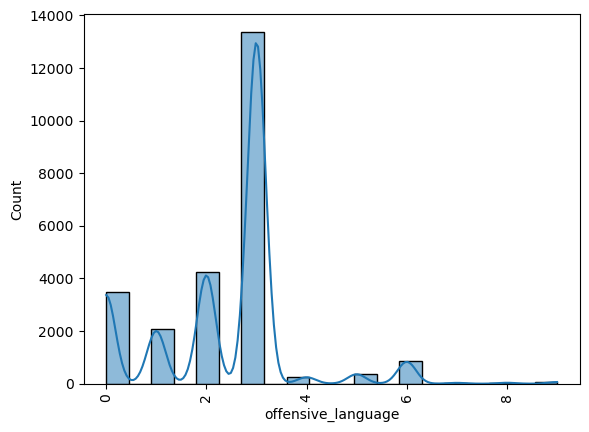

In [26]:
sns.histplot(df['offensive_language'], bins=20, kde=True)
plt.xticks(rotation=90)
plt.show()

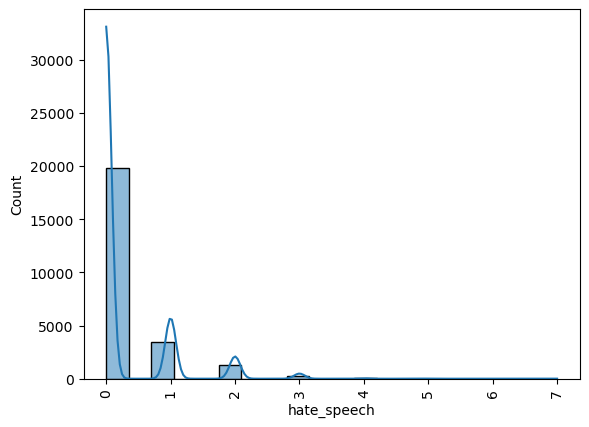

In [27]:
sns.histplot(df['hate_speech'], bins=20, kde=True)
plt.xticks(rotation=90)
plt.show()

### Violinplot

<Axes: >

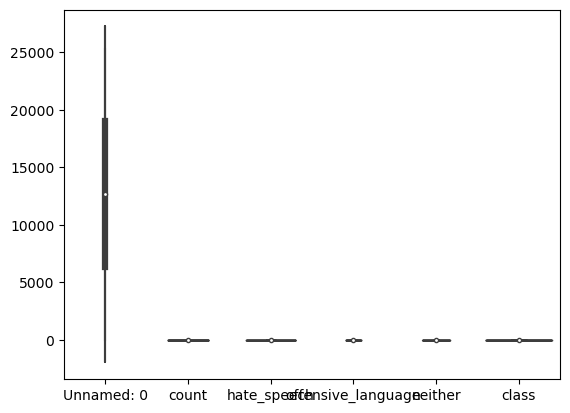

In [28]:
sns.violinplot(df)

### Strip plot

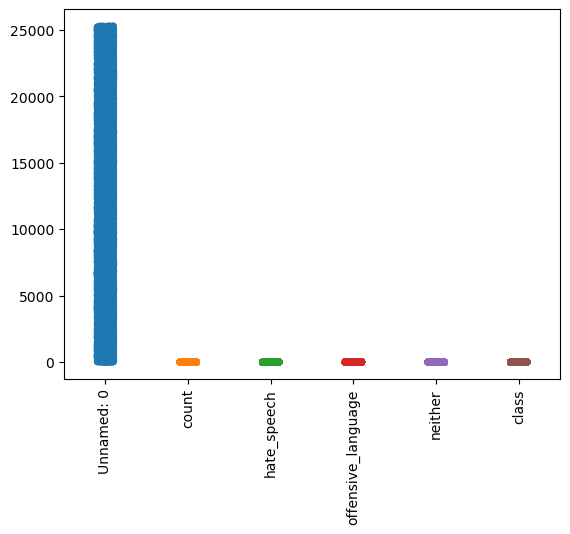

In [29]:
sns.stripplot(df)
plt.xticks(rotation=90)
plt.show()

### ECDF Plot

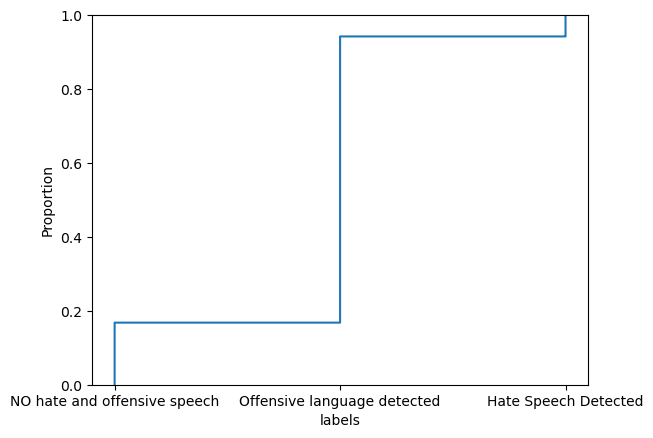

In [30]:
sns.ecdfplot(x=df['labels'], data=df)
plt.show()

### Scatterplot

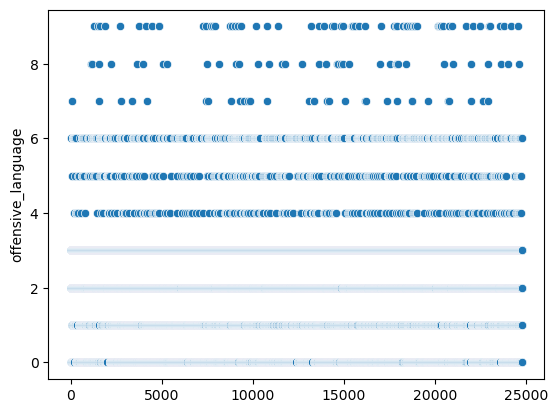

In [31]:
sns.scatterplot(df['offensive_language'])
plt.show()

### Relplot

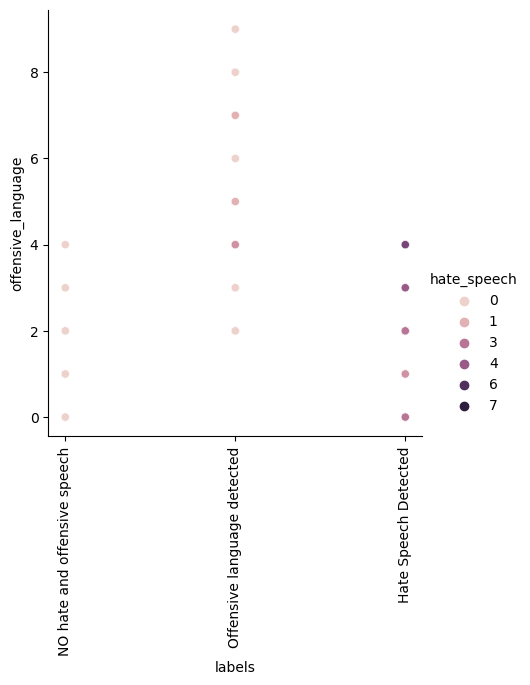

In [32]:
sns.relplot(x='labels', y='offensive_language', hue = 'hate_speech', data=df)
plt.xticks(rotation=90)
plt.show()

In [33]:
df=df[['tweet','labels']]

In [34]:
df

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,NO hate and offensive speech
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language detected
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive language detected
24779,"you've gone and broke the wrong heart baby, an...",NO hate and offensive speech
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive language detected
24781,youu got wild bitches tellin you lies,Offensive language detected


In [35]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text =  re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text


df["tweet"] = df["tweet"].apply(clean)
print(df.head())

                                               tweet  \
0   rt mayasolov woman shouldnt complain clean ho...   
1   rt  boy dat coldtyga dwn bad cuffin dat hoe  ...   
2   rt urkindofbrand dawg rt  ever fuck bitch sta...   
3             rt cganderson vivabas look like tranni   
4   rt shenikarobert shit hear might true might f...   

                         labels  
0  NO hate and offensive speech  
1   Offensive language detected  
2   Offensive language detected  
3   Offensive language detected  
4   Offensive language detected  


In [36]:
df.isnull().sum()

tweet     0
labels    0
dtype: int64

In [37]:
df.head()

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,NO hate and offensive speech
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive language detected
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive language detected
3,rt cganderson vivabas look like tranni,Offensive language detected
4,rt shenikarobert shit hear might true might f...,Offensive language detected


# Decision Tree

In [38]:
x=np.array(df["tweet"])
y=np.array(df["labels"])

In [39]:
cv=CountVectorizer()

In [40]:
x=cv.fit_transform(x)

In [41]:
x

<24783x25693 sparse matrix of type '<class 'numpy.int64'>'
	with 197862 stored elements in Compressed Sparse Row format>

In [42]:
y

array(['NO hate and offensive speech', 'Offensive language detected',
       'Offensive language detected', ..., 'Offensive language detected',
       'Offensive language detected', 'NO hate and offensive speech'],
      dtype=object)

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [44]:
clf=DecisionTreeClassifier()

In [45]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
y_pred=clf.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score, classification_report

acc = accuracy_score(y_pred,y_test)
print(acc)

0.8759016994742633


In [48]:
print('Classification Report')
print(classification_report(y_pred,y_test))

Classification Report
                              precision    recall  f1-score   support

        Hate Speech Detected       0.33      0.37      0.35       407
NO hate and offensive speech       0.82      0.81      0.81      1391
 Offensive language detected       0.93      0.92      0.93      6381

                    accuracy                           0.88      8179
                   macro avg       0.69      0.70      0.70      8179
                weighted avg       0.88      0.88      0.88      8179



In [49]:
#Confusion Matrix of KNN model
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[ 152   40  273]
 [  35 1124  220]
 [ 220  227 5888]]
True Positives(TP) =  152
True Negatives(TN) =  1124
False Positives(FP) =  40
False Negatives(FN) =  35


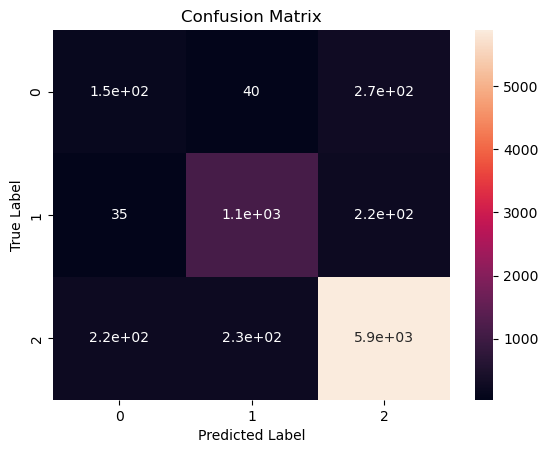

In [50]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [51]:
test_data = "I will kill you"
df1=cv.transform([test_data]).toarray()
print(clf.predict(df1))

['Hate Speech Detected']


In [52]:
test_data2 = "You are bad i don't like you"
df2=cv.transform([test_data2]).toarray()
print(clf.predict(df2))

['Offensive language detected']


In [53]:
test_data3 = "I will not kill you"
df3=cv.transform([test_data3]).toarray()
print(clf.predict(df3))

['Hate Speech Detected']


# KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [55]:
x_knn=np.array(df["tweet"])
y_knn=np.array(df["labels"])

In [56]:
cv_knn=CountVectorizer()

In [57]:
x_knn= cv.fit_transform(x_knn)

In [58]:
X_train_knn, X_test_knn, Y_train_knn, Y_test_knn = train_test_split(x_knn, y_knn, test_size=0.2, random_state=42)

In [59]:
knn = KNeighborsClassifier(n_neighbors=10)

#Training the model
knn.fit(X_train_knn,Y_train_knn)

KNeighborsClassifier(n_neighbors=10)

In [60]:
knn.score(X_test_knn,Y_test_knn)

0.8482953399233407

In [61]:
#Making prediction on test set
Y_pred_knn= knn.predict(X_test_knn)

In [62]:
#Accuracy of KNN model
acc_knn = accuracy_score(Y_test_knn, Y_pred_knn)
print("Accuracy:", acc_knn)

Accuracy: 0.8482953399233407


In [63]:
#Classification report of KNN model
print(classification_report(Y_test_knn, Y_pred_knn))

                              precision    recall  f1-score   support

        Hate Speech Detected       0.47      0.31      0.38       290
NO hate and offensive speech       0.79      0.57      0.67       835
 Offensive language detected       0.87      0.95      0.91      3832

                    accuracy                           0.85      4957
                   macro avg       0.71      0.61      0.65      4957
                weighted avg       0.84      0.85      0.84      4957



In [64]:
#Confusion Matrix of KNN model
cm=confusion_matrix(Y_test_knn, Y_pred_knn)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[  90   24  176]
 [   6  479  350]
 [  94  102 3636]]
True Positives(TP) =  90
True Negatives(TN) =  479
False Positives(FP) =  24
False Negatives(FN) =  6


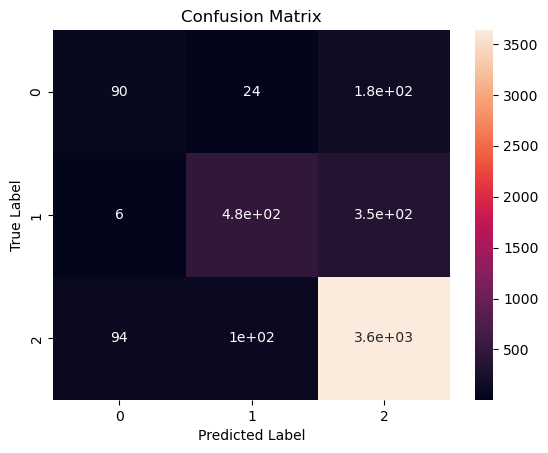

In [65]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## KNN Tuning

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
#Grid Search

param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Test different values of k
    'weights': ['uniform', 'distance'],  # Weighting type
    'p': [1, 2],  # Distance metric (1 for Manhattan, 2 for Euclidean)
}

In [68]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5,scoring='accuracy')
grid_search.fit(X_train_knn, Y_train_knn)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [69]:
best_param = grid_search.best_params_
best_knn = KNeighborsClassifier(n_neighbors = best_param['n_neighbors'], weights = best_param['weights'],p=best_param['p'])
best_knn.fit(X_train_knn, Y_train_knn)
Y_pred_knn = best_knn.predict(X_test_knn)

In [70]:
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [71]:
acc_knn = accuracy_score(Y_test_knn, Y_pred_knn)
acc_knn

0.8539439176921525

In [72]:
print (classification_report(Y_test_knn, Y_pred_knn))

                              precision    recall  f1-score   support

        Hate Speech Detected       0.40      0.33      0.37       290
NO hate and offensive speech       0.75      0.69      0.72       835
 Offensive language detected       0.90      0.93      0.91      3832

                    accuracy                           0.85      4957
                   macro avg       0.69      0.65      0.67      4957
                weighted avg       0.85      0.85      0.85      4957



In [73]:
cm=confusion_matrix(Y_test_knn, Y_pred_knn)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[  97   32  161]
 [  28  579  228]
 [ 116  159 3557]]
True Positives(TP) =  97
True Negatives(TN) =  579
False Positives(FP) =  32
False Negatives(FN) =  28


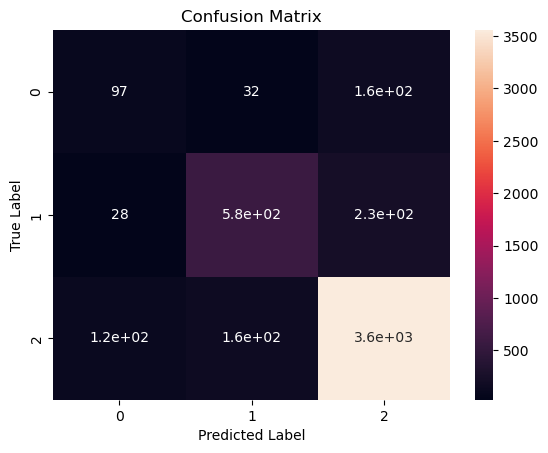

In [74]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [75]:
#Euclidean method

knn_classifier = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

In [76]:
knn_classifier.fit(X_train_knn, Y_train_knn)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [77]:
Y_pred_knn_eu = knn_classifier.predict(X_test_knn)

In [78]:
accuracy = accuracy_score(Y_test_knn, Y_pred_knn_eu)  # For classification
print('accuracy:',accuracy)

accuracy: 0.8482953399233407


In [79]:
print(classification_report(Y_test_knn, Y_pred_knn_eu))

                              precision    recall  f1-score   support

        Hate Speech Detected       0.47      0.31      0.38       290
NO hate and offensive speech       0.79      0.57      0.67       835
 Offensive language detected       0.87      0.95      0.91      3832

                    accuracy                           0.85      4957
                   macro avg       0.71      0.61      0.65      4957
                weighted avg       0.84      0.85      0.84      4957



In [80]:
cm=confusion_matrix(Y_test_knn, Y_pred_knn_eu)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[  90   24  176]
 [   6  479  350]
 [  94  102 3636]]
True Positives(TP) =  90
True Negatives(TN) =  479
False Positives(FP) =  24
False Negatives(FN) =  6


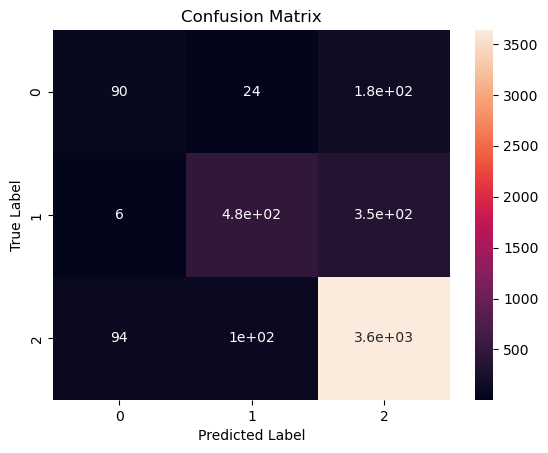

In [81]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [82]:
#Manhatan distance method

knn_classifier = KNeighborsClassifier(n_neighbors=10, metric='manhattan')

In [83]:
knn_classifier.fit(X_train_knn, Y_train_knn)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [84]:
Y_pred_knn_mh = knn_classifier.predict(X_test_knn)

In [85]:
accuracy_knn_mh = accuracy_score(Y_test_knn, Y_pred_knn_mh) 
print('accuracy:',accuracy_knn_mh)

accuracy: 0.8452693161186201


In [86]:
print(classification_report(Y_test_knn, Y_pred_knn))

                              precision    recall  f1-score   support

        Hate Speech Detected       0.40      0.33      0.37       290
NO hate and offensive speech       0.75      0.69      0.72       835
 Offensive language detected       0.90      0.93      0.91      3832

                    accuracy                           0.85      4957
                   macro avg       0.69      0.65      0.67      4957
                weighted avg       0.85      0.85      0.85      4957



In [87]:
cm=confusion_matrix(Y_test_knn, Y_pred_knn_mh)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[  81   29  180]
 [  18  486  331]
 [ 102  107 3623]]
True Positives(TP) =  81
True Negatives(TN) =  486
False Positives(FP) =  29
False Negatives(FN) =  18


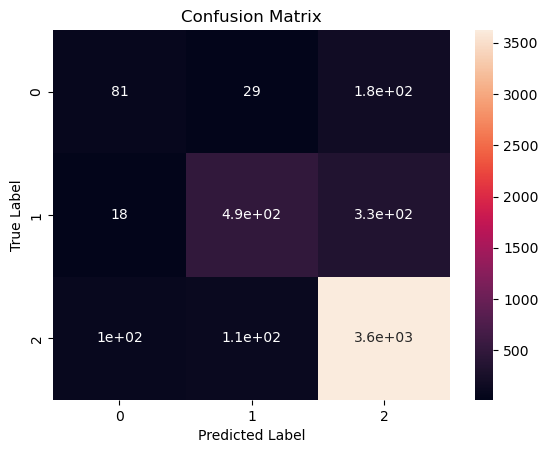

In [88]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [89]:
#Minkowsky distance method

knn_classifier = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)

In [90]:
knn_classifier.fit(X_train_knn, Y_train_knn)

KNeighborsClassifier(n_neighbors=10)

In [91]:
Y_pred_knn_mk = knn_classifier.predict(X_test_knn)

In [92]:
accuracy_knn_mk = accuracy_score(Y_test_knn, Y_pred_knn_mk)  # For classification
print('accuracy:',accuracy_knn_mk)

accuracy: 0.8482953399233407


In [93]:
print(classification_report(Y_test_knn, Y_pred_knn_mk))

                              precision    recall  f1-score   support

        Hate Speech Detected       0.47      0.31      0.38       290
NO hate and offensive speech       0.79      0.57      0.67       835
 Offensive language detected       0.87      0.95      0.91      3832

                    accuracy                           0.85      4957
                   macro avg       0.71      0.61      0.65      4957
                weighted avg       0.84      0.85      0.84      4957



In [94]:
cm=confusion_matrix(Y_test_knn, Y_pred_knn_mk)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[  90   24  176]
 [   6  479  350]
 [  94  102 3636]]
True Positives(TP) =  90
True Negatives(TN) =  479
False Positives(FP) =  24
False Negatives(FN) =  6


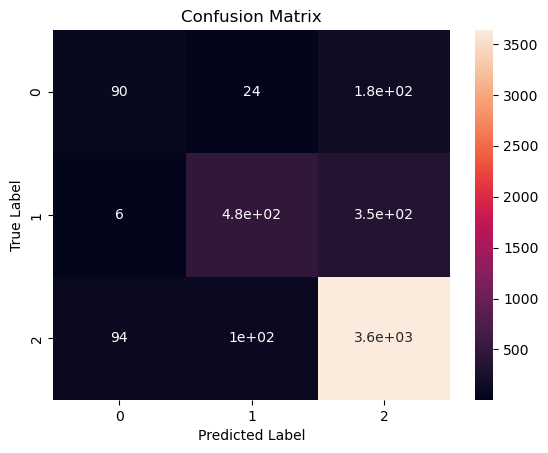

In [95]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# SVM

In [96]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

In [97]:
x_svm=np.array(df["tweet"])
y_svm=np.array(df["labels"])

In [98]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv_svm = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
x_svm = tfidf.fit_transform(x_svm).toarray()


In [99]:
X_train_svm, X_test_svm, Y_train_svm, Y_test_svm = train_test_split(x_svm, y_svm, test_size=0.2, random_state=42)

In [100]:
#Running with default hyperparameter
svc = SVC()

In [101]:
svc.fit(X_train_svm, Y_train_svm)

SVC()

In [102]:
Y_pred_svm = svc.predict(X_test_svm)

In [103]:
#Accuracy of SVM model
acc_svm = accuracy_score(Y_test_svm, Y_pred_svm)
print("Accuracy Score with default parameter : {:.2f}%". format(acc_svm*100))

Accuracy Score with default parameter : 89.43%


In [104]:
#Classification report of SVM model
print(classification_report(Y_test_svm, Y_pred_svm))

                              precision    recall  f1-score   support

        Hate Speech Detected       0.50      0.11      0.18       290
NO hate and offensive speech       0.84      0.84      0.84       835
 Offensive language detected       0.91      0.97      0.94      3832

                    accuracy                           0.89      4957
                   macro avg       0.75      0.64      0.65      4957
                weighted avg       0.88      0.89      0.88      4957



In [105]:
#Confusion Matrix of SVM model
cm = confusion_matrix(Y_test_svm, Y_pred_svm)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[  31   25  234]
 [   4  704  127]
 [  27  107 3698]]
True Positives(TP) =  31
True Negatives(TN) =  704
False Positives(FP) =  25
False Negatives(FN) =  4


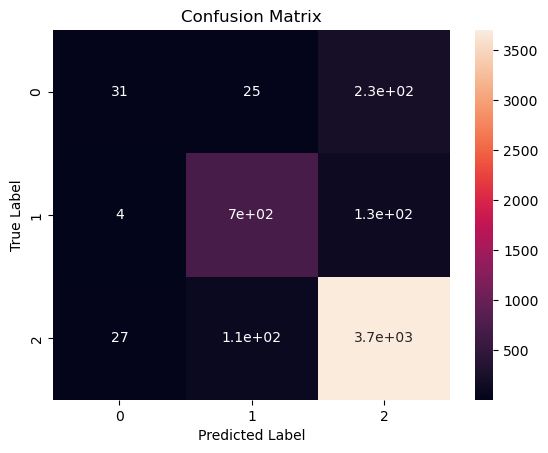

In [106]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [107]:
#SVM with linear kernel

linear_svc = SVC(kernel='linear')

In [108]:
linear_svc.fit(X_train_svm, Y_train_svm)

SVC(kernel='linear')

In [109]:
Y_predLinear_svm = linear_svc.predict(X_test_svm)

In [110]:
acc_svm = accuracy_score(Y_test_svm, Y_predLinear_svm)
print("Accuracy Score with Linear Kernel : {:.2f}%". format(acc_svm*100))

Accuracy Score with Linear Kernel : 89.55%


In [111]:
print(classification_report(Y_test_svm, Y_predLinear_svm))

                              precision    recall  f1-score   support

        Hate Speech Detected       0.53      0.14      0.22       290
NO hate and offensive speech       0.83      0.86      0.84       835
 Offensive language detected       0.92      0.96      0.94      3832

                    accuracy                           0.90      4957
                   macro avg       0.76      0.65      0.67      4957
                weighted avg       0.88      0.90      0.88      4957



In [112]:
cm = confusion_matrix(Y_test_svm, Y_predLinear_svm)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[  41   29  220]
 [   7  716  112]
 [  30  120 3682]]
True Positives(TP) =  41
True Negatives(TN) =  716
False Positives(FP) =  29
False Negatives(FN) =  7


<Axes: >

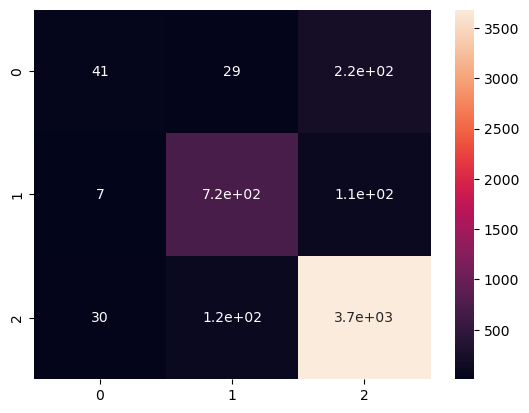

In [113]:
sns.heatmap(cm, annot=True)

In [114]:
#SVM with RBF Kernel

rbf_svc = SVC(kernel='rbf')

In [115]:
rbf_svc.fit(X_train_svm, Y_train_svm)

SVC()

In [116]:
Y_predRBF_svm = rbf_svc.predict(X_test_svm)

In [117]:
acc_rbf_svm = accuracy_score(Y_test_svm, Y_predRBF_svm)
print("Accuracy Score with RBF Kernel : {:.2f}%". format(acc_rbf_svm*100))

Accuracy Score with RBF Kernel : 89.43%


In [118]:
print(classification_report(Y_test_svm, Y_predRBF_svm))

                              precision    recall  f1-score   support

        Hate Speech Detected       0.50      0.11      0.18       290
NO hate and offensive speech       0.84      0.84      0.84       835
 Offensive language detected       0.91      0.97      0.94      3832

                    accuracy                           0.89      4957
                   macro avg       0.75      0.64      0.65      4957
                weighted avg       0.88      0.89      0.88      4957



In [119]:
cm = confusion_matrix(Y_test_svm, Y_predRBF_svm)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[  31   25  234]
 [   4  704  127]
 [  27  107 3698]]
True Positives(TP) =  31
True Negatives(TN) =  704
False Positives(FP) =  25
False Negatives(FN) =  4


<Axes: >

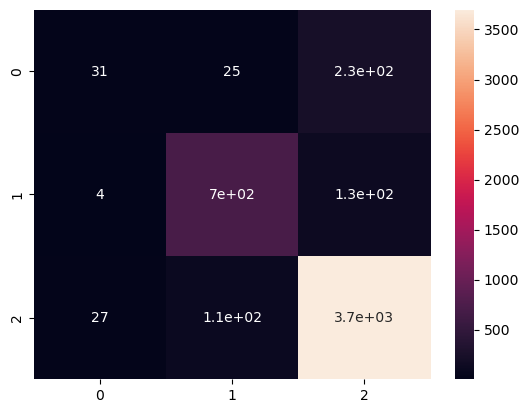

In [120]:
sns.heatmap(cm, annot=True)

In [121]:
#SVM with Sigmoid Kernel

sigmoid_svc = SVC(kernel='sigmoid')

In [122]:
sigmoid_svc.fit(X_train_svm, Y_train_svm)

SVC(kernel='sigmoid')

In [123]:
Y_predsigmoid_svm = sigmoid_svc.predict(X_test_svm)

In [124]:
acc_sigmoid_svm = accuracy_score(Y_test_svm, Y_predsigmoid_svm)
print("Accuracy Score with Sigmoid Kernel : {:.2f}%". format(acc_sigmoid_svm*100))

Accuracy Score with Sigmoid Kernel : 89.59%


In [125]:
print(classification_report(Y_test_svm, Y_predsigmoid_svm))

                              precision    recall  f1-score   support

        Hate Speech Detected       0.53      0.16      0.25       290
NO hate and offensive speech       0.83      0.86      0.84       835
 Offensive language detected       0.92      0.96      0.94      3832

                    accuracy                           0.90      4957
                   macro avg       0.76      0.66      0.68      4957
                weighted avg       0.88      0.90      0.88      4957



In [126]:
cm = confusion_matrix(Y_test_svm, Y_predsigmoid_svm)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[  47   28  215]
 [   5  721  109]
 [  36  123 3673]]
True Positives(TP) =  47
True Negatives(TN) =  721
False Positives(FP) =  28
False Negatives(FN) =  5


<Axes: >

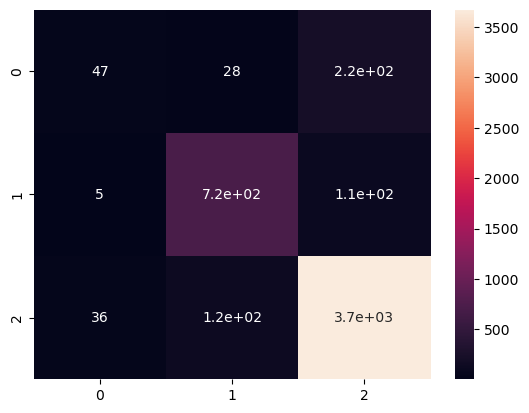

In [127]:
sns.heatmap(cm, annot=True)

In [128]:
#SVM with Polynomial Kernel

poly_svc = SVC(kernel='poly')

In [129]:
poly_svc.fit(X_train_svm, Y_train_svm)

SVC(kernel='poly')

In [130]:
Y_predPoly_svm = poly_svc.predict(X_test_svm)

In [131]:
acc_poly_svm = accuracy_score(Y_test_svm, Y_predPoly_svm)
print("Accuracy Score with Polynomial Kernel : {:.2f}%". format(acc_poly_svm*100))

Accuracy Score with Polynomial Kernel : 80.73%


In [132]:
print(classification_report(Y_test_svm, Y_predPoly_svm))

                              precision    recall  f1-score   support

        Hate Speech Detected       0.46      0.06      0.10       290
NO hate and offensive speech       0.88      0.24      0.37       835
 Offensive language detected       0.81      0.99      0.89      3832

                    accuracy                           0.81      4957
                   macro avg       0.72      0.43      0.45      4957
                weighted avg       0.80      0.81      0.76      4957



In [133]:
cm = confusion_matrix(Y_test_svm, Y_predPoly_svm)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[  17    2  271]
 [   1  197  637]
 [  19   25 3788]]
True Positives(TP) =  17
True Negatives(TN) =  197
False Positives(FP) =  2
False Negatives(FN) =  1


<Axes: >

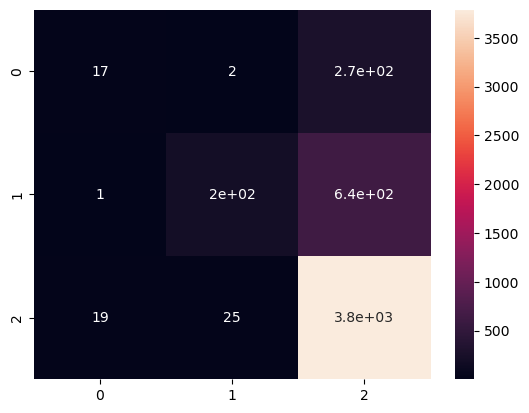

In [134]:
sns.heatmap(cm, annot=True)

## Tuning SVM

In [135]:
#Grid Search

param_grid = {
    'C' : [0.1, 1, 10, 100],
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid']
}

In [136]:
svcm = SVC()

In [137]:
grid_search = GridSearchCV(svcm, param_grid, cv=5)

In [138]:
grid_search.fit(X_train_svm, Y_train_svm)

KeyboardInterrupt: 

In [ ]:
best_param_svm = grid_search.best_params_
print("Best hyperparameter : ", best_param_svm)

In [ ]:
best_svm = SVC(C=best_param_svm['C'], kernel=best_param_svm['kernel'])

In [ ]:
best_svm.fit(X_train_svm, Y_train_svm)

In [ ]:
Y_pred_tun_svm = best_svm.predict(X_test_svm)

In [ ]:
acc_tun_svm = accuracy_score(Y_test_svm, Y_pred_tun_svm)
print("Accuracy after Grid Search : {:.2f}%". format(acc_tun_svm * 100))

In [ ]:
print(classification_report(Y_test_svm, Y_pred_svm))

In [ ]:
cm = confusion_matrix(Y_test_svm, Y_pred_tun_svm)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
#Tuning the model with Random Search

param_grid = {
    'C' : [0.1, 1, 10, 100],
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid']
}

In [ ]:
svcmm = SVC()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(svcmm, param_grid, cv=5)

In [ ]:
random_search.fit(X_train_svm, Y_train_svm)

In [ ]:
best_param_rs_svm = random_search.best_params_
print("Best Parameter : ", best_param_rs_svm)

In [ ]:
best_svm_rs = SVC(C=best_param_rs_svm['C'], kernel=best_param_rs_svm['kernel'])

In [ ]:
best_svm_rs.fit(X_train_svm, Y_train_svm)

In [ ]:
Y_pred_rs_svm = best_svm_rs.predict(X_test_svm)

In [ ]:
acc_rs_svm = accuracy_score(Y_test_svm, Y_pred_rs_svm)
print("Accuracy after Randomized Search: {:.2f}%" . format(acc_rs_svm * 100))

In [ ]:
print(classification_report(Y_test_svm, Y_pred_rs_svm))

In [ ]:
cm = confusion_matrix(Y_test_svm, Y_pred_rs_svm)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

In [ ]:
sns.heatmap(cm, annot=True)

# Logistic Regression

In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
x_lor=np.array(df["tweet"])
y_lor=np.array(df["labels"])

In [141]:
cv_lor=CountVectorizer()
x_lor= cv_lor.fit_transform(x_lor)

In [142]:
X_train_lor, X_test_lor, Y_train_lor, Y_test_lor = train_test_split(x_lor, y_lor, test_size=0.2, random_state=42)

In [143]:
lor = LogisticRegression()

lor.fit(X_train_lor,Y_train_lor)
y_predicted_lor = lor.predict(X_test_lor)

In [144]:
lor.predict_proba(X_test_lor)

array([[4.67877529e-03, 2.55407708e-04, 9.95065817e-01],
       [1.52501681e-03, 8.00522536e-06, 9.98466978e-01],
       [2.22506802e-03, 1.20128779e-01, 8.77646153e-01],
       ...,
       [9.90904192e-03, 2.74413957e-04, 9.89816544e-01],
       [1.68439435e-01, 1.05232980e-02, 8.21037268e-01],
       [1.12164226e-02, 1.47285981e-03, 9.87310718e-01]])

In [145]:
lor.score(X_test_lor,Y_test_lor)

0.8926770223925762

In [146]:
lor.coef_ 

array([[ 0.28616955,  0.        , -0.08501712, ..., -0.01417363,
        -0.00780366,  0.42725769],
       [-0.06017044,  0.        , -0.00061859, ..., -0.00194629,
         0.13422793, -0.02672619],
       [-0.22599911,  0.        ,  0.08563571, ...,  0.01611992,
        -0.12642428, -0.4005315 ]])

In [147]:
lor.intercept_   #y_intercept

array([-1.75531072,  0.78914823,  0.96616249])

In [148]:
import math

def sigmoid(x):
    return 1/(1 + math.exp(-x))

In [149]:
def prediction_function(age):
    z= 0.14915498 * age - 5.80219736 # y = B0 + B1 * x
    y = sigmoid(z)
    return y

In [150]:
#Calculating Test Score
print('Test Score : ', lor.score(X_test_lor, Y_test_lor))

Test Score :  0.8926770223925762


In [151]:
#Predicting the train value
pred_train = lor.predict(X_train_lor)

In [152]:
#Predicting the test value
pred_test = lor.predict(X_test_lor)

In [153]:
#Classification report for the Training set
print(classification_report(Y_test_lor, pred_test))

                              precision    recall  f1-score   support

        Hate Speech Detected       0.47      0.23      0.31       290
NO hate and offensive speech       0.84      0.84      0.84       835
 Offensive language detected       0.92      0.96      0.94      3832

                    accuracy                           0.89      4957
                   macro avg       0.74      0.67      0.69      4957
                weighted avg       0.88      0.89      0.88      4957



# Tuning - LOR

In [154]:
param_grid = {
    'penalty' : ['l1', 'l2'],                         #l1 lasso l2 Ridge
    'C' : [0.1, 0.5, 1, 5, 10]
}

In [155]:
grid = GridSearchCV(estimator=lor, param_grid=param_grid, cv=5)

In [156]:
grid.fit(X_train_lor,Y_train_lor)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [157]:
 #Getting the best hyperparameters
best_params_lor = grid.best_params_

# Getting the best model
best_lor = grid.best_estimator_

In [158]:
# Making predictions on the test set
Y_pred_tun_lor = best_lor.predict(X_test_lor)

In [159]:
# Evaluating the best model
acc_tun_lor = accuracy_score(Y_test_lor, Y_pred_tun_lor)
print("Accuracy after Grid Search : {:.2f}%". format(acc_tun_lor * 100))

Accuracy after Grid Search : 89.57%


In [160]:
#Confusion Matrix after Grid Search
confusion = confusion_matrix(Y_test_lor, Y_pred_tun_lor)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[  58   28  204]
 [   6  715  114]
 [  57  108 3667]]


<Axes: >

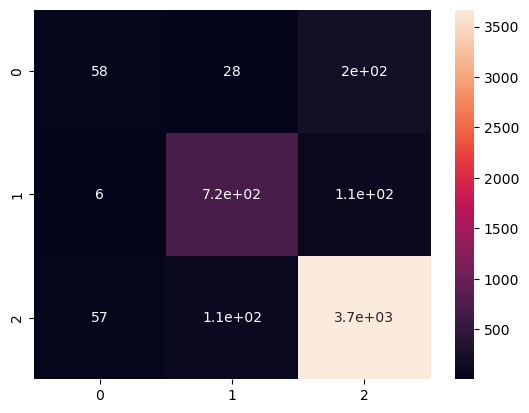

In [161]:
sns.heatmap(confusion, annot=True)

In [162]:
#Classification report after Grid Search
classification_rep = classification_report(Y_test_lor, Y_pred_tun_lor)
print('Classification Report:')
print(classification_rep)

Classification Report:
                              precision    recall  f1-score   support

        Hate Speech Detected       0.48      0.20      0.28       290
NO hate and offensive speech       0.84      0.86      0.85       835
 Offensive language detected       0.92      0.96      0.94      3832

                    accuracy                           0.90      4957
                   macro avg       0.75      0.67      0.69      4957
                weighted avg       0.88      0.90      0.88      4957



In [163]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV


# Defining hyperparameters and their possible values for tuning
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': uniform(loc=0, scale=4)  # Random values between 0 and 4 for regularization strength (C)
}

In [164]:
# Creating a RandomizedSearchCV object
random_search = RandomizedSearchCV(lor, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)

In [165]:
# Fitting the RandomizedSearchCV object to the training data
random_search.fit(X_train_lor, Y_train_lor)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000210F373AD10>,
                                        'penalty': ['l1', 'l2']},
                   random_state=42)

In [166]:
# Getting the best hyperparameters
best_params_rs_tun_lor = random_search.best_params_

In [167]:
# Getting the best model
best_lor_rs = random_search.best_estimator_

In [168]:
# Making predictions on the test set
Y_pred_rs_tun_lor = best_lor_rs.predict(X_test_lor)

In [169]:
# Evaluating the best model
acc_rs_tun_lor = accuracy_score(Y_test_lor, Y_pred_rs_tun_lor)
acc_rs_tun_lor

0.8961065160379261

In [170]:
#Classification report after Randomized Search
classification_rep = classification_report(Y_test_lor, Y_pred_rs_tun_lor)
print('Classification Report:')
print(classification_rep)

Classification Report:
                              precision    recall  f1-score   support

        Hate Speech Detected       0.49      0.20      0.28       290
NO hate and offensive speech       0.84      0.86      0.85       835
 Offensive language detected       0.92      0.96      0.94      3832

                    accuracy                           0.90      4957
                   macro avg       0.75      0.67      0.69      4957
                weighted avg       0.88      0.90      0.88      4957



In [171]:
#Confusion Matrix 
confusion = confusion_matrix(Y_test_lor, Y_pred_rs_tun_lor)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[  58   27  205]
 [   5  715  115]
 [  55  108 3669]]


<Axes: >

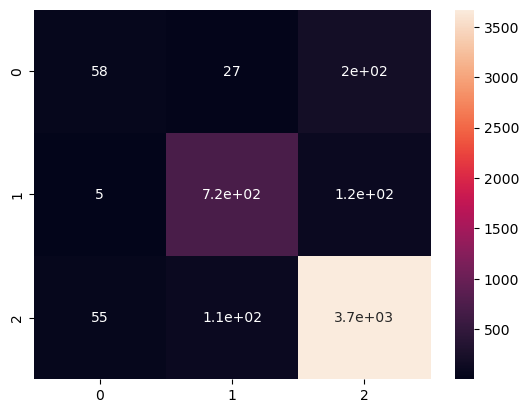

In [172]:
sns.heatmap(confusion, annot=True)

# Random Forest

In [173]:
from sklearn.ensemble import RandomForestClassifier

In [174]:
x_rf=np.array(df["tweet"])
y_rf=np.array(df["labels"])

In [175]:
cv_rf=CountVectorizer()
x_rf= cv_rf.fit_transform(x_rf)

In [176]:
X_train_rf, X_test_rf, Y_train_rf, Y_test_rf = train_test_split(x_rf, y_rf, test_size=0.2, random_state=42)

In [177]:
# Create a Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [178]:
# Fit the model on the training data
rf.fit(X_train_rf, Y_train_rf)

RandomForestClassifier(random_state=42)

In [179]:
# Predict on the test data
y_pred_rf = rf.predict(X_test_rf)

In [180]:
# Calculate accuracy
acc_rf = rf.score(X_test_rf, Y_test_rf)
print("Accuracy:", acc_rf)

Accuracy: 0.8916683477910026


In [181]:
#Classification report 
classification_rep_rf = classification_report(Y_test_rf, y_pred_rf)
print('Classification Report:')
print(classification_rep_rf)

Classification Report:
                              precision    recall  f1-score   support

        Hate Speech Detected       0.54      0.27      0.36       290
NO hate and offensive speech       0.82      0.82      0.82       835
 Offensive language detected       0.92      0.95      0.94      3832

                    accuracy                           0.89      4957
                   macro avg       0.76      0.68      0.71      4957
                weighted avg       0.88      0.89      0.88      4957



## Tuning - RF

In [182]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 25],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [183]:
rf = RandomForestClassifier(random_state=42)

In [184]:
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, param_grid, n_iter=20, cv=5, random_state=42)

In [185]:
# Fit the model to the training data
random_search.fit(X_train_rf, Y_train_rf)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42)

In [186]:
# Print the best hyperparameters found
print("Best hyperparameters:", random_search.best_params_)

Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 25}


In [187]:
# Get the best model
best_model = random_search.best_estimator_

In [188]:
# Make predictions on the test set
y_pred_tun_rf = best_model.predict(X_test_rf)

In [189]:
# Evaluate performance
acc_tun_rf = best_model.score(X_test_rf, Y_test_rf)
print("Accuracy:", acc_tun_rf)

Accuracy: 0.7740568892475288


In [190]:
#Classification report after Randomized Search
classification_rep_tun_rf = classification_report(Y_test_rf, y_pred_tun_rf)
print('Classification Report:')
print(classification_rep_tun_rf)

Classification Report:
                              precision    recall  f1-score   support

        Hate Speech Detected       0.00      0.00      0.00       290
NO hate and offensive speech       1.00      0.01      0.01       835
 Offensive language detected       0.77      1.00      0.87      3832

                    accuracy                           0.77      4957
                   macro avg       0.59      0.34      0.29      4957
                weighted avg       0.77      0.77      0.68      4957



In [191]:
confusion = confusion_matrix(Y_test_rf, y_pred_tun_rf)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[   0    0  290]
 [   0    5  830]
 [   0    0 3832]]


<Axes: >

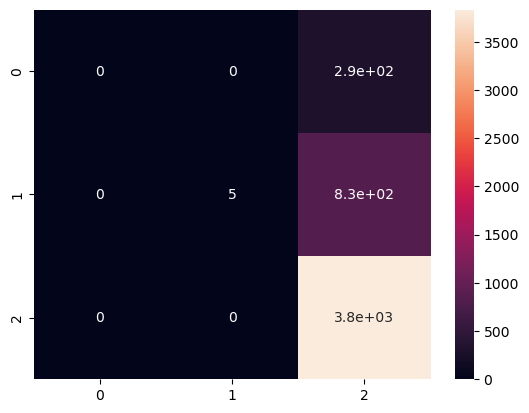

In [192]:
sns.heatmap(confusion, annot=True)

# Naive Bayes

In [193]:
 from sklearn import model_selection, naive_bayes, svm, metrics,feature_extraction

In [194]:
x_nb=np.array(df["tweet"])
y_nb=np.array(df["labels"])

In [195]:
cv_nb=CountVectorizer()
x_nb= cv_nb.fit_transform(x_nb)

In [196]:
X_train_nb, X_test_nb, Y_train_nb, Y_test_nb = train_test_split(x_nb, y_nb, test_size=0.2, random_state=42)

In [197]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaled_data = scaler.fit_transform(X_train_nb) 
X_train_nb = scaler.fit_transform(X_train_nb)
X_test_nb = scaler.transform(X_test_nb)


In [198]:
#choosing the naive bayes 
bayes = naive_bayes.BernoulliNB()
bayes.fit(X_train_nb,Y_train_nb)

BernoulliNB()

In [199]:
# predicting the y value based on bayes model
y_pred_nb=bayes.predict(X_test_nb)

In [200]:
#calculating the accuracy of the model on the testing data
acc_nb=metrics.accuracy_score(Y_test_nb,y_pred_nb)
acc_nb

0.8351825701028848

In [201]:
# generating the classification report for the performance measures.
print(metrics.classification_report(Y_test_nb, y_pred_nb))

                              precision    recall  f1-score   support

        Hate Speech Detected       1.00      0.00      0.01       290
NO hate and offensive speech       0.84      0.42      0.56       835
 Offensive language detected       0.83      0.99      0.91      3832

                    accuracy                           0.84      4957
                   macro avg       0.89      0.47      0.49      4957
                weighted avg       0.85      0.84      0.79      4957



[[   1   23  266]
 [   0  349  486]
 [   0   42 3790]]


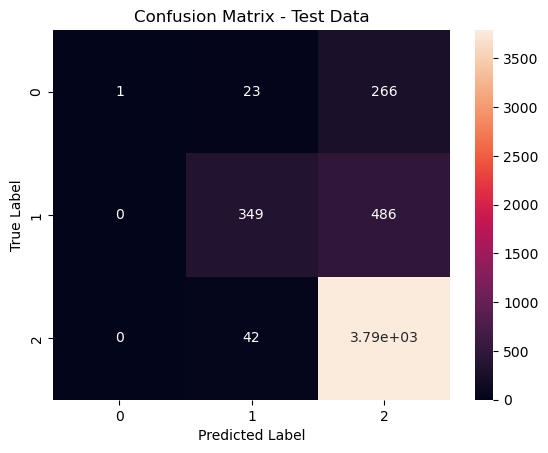

In [202]:
cm=confusion_matrix(Y_test_nb,y_pred_nb)
print(cm)
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Tuning Naive bayes

In [203]:
 param_grid = {
'alpha': [0.1, 1, 10, 100],
'fit_prior': [True, False]
}

In [204]:
bayes = naive_bayes.BernoulliNB()
grid_search = GridSearchCV(bayes, param_grid, cv=5)
grid_search.fit(X_train_nb, Y_train_nb)

GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'fit_prior': [True, False]})

In [205]:
best_param = grid_search.best_params_
best_nb = naive_bayes.BernoulliNB(alpha = best_param['alpha'], fit_prior = best_param['fit_prior'])
best_nb.fit(X_train_nb, Y_train_nb)
y_pred_1 = best_nb.predict(X_test_nb)

In [206]:
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'alpha': 0.1, 'fit_prior': True}


In [207]:
acc_nb_tun = accuracy_score(Y_test_nb, y_pred_1)
acc_nb_tun

0.8376033891466613

In [208]:
print (classification_report(Y_test_nb,y_pred_1))

                              precision    recall  f1-score   support

        Hate Speech Detected       0.25      0.40      0.31       290
NO hate and offensive speech       0.80      0.71      0.75       835
 Offensive language detected       0.92      0.90      0.91      3832

                    accuracy                           0.84      4957
                   macro avg       0.66      0.67      0.66      4957
                weighted avg       0.86      0.84      0.85      4957



[[ 115   25  150]
 [  77  594  164]
 [ 263  126 3443]]


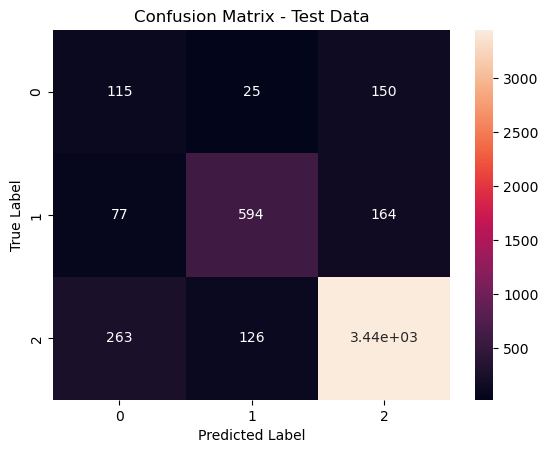

In [209]:
cm=confusion_matrix(Y_test_nb,y_pred_1)
print(cm)
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [210]:
#Randomized Search 
param_dist = {
    'alpha': uniform(0.1, 2.0),  # Example: Uniform distribution for alpha
    'fit_prior':[True,False]
}

In [211]:
bayes = naive_bayes.BernoulliNB()
x_new_nb=scaler.fit_transform(x_nb)

In [212]:
randomized_search = RandomizedSearchCV(bayes, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5)
randomized_search.fit(x_new_nb, y_nb)

RandomizedSearchCV(cv=5, estimator=BernoulliNB(),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000210E1D51210>,
                                        'fit_prior': [True, False]},
                   scoring='accuracy')

In [213]:
best_param = randomized_search.best_params_
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'alpha': 0.5167221630595208, 'fit_prior': False}


In [214]:
best_nb = naive_bayes.BernoulliNB(alpha = best_param['alpha'], fit_prior = best_param['fit_prior'])
best_nb.fit(X_train_nb, Y_train_nb)
y_pred_2 = best_nb.predict(X_test_nb)

In [215]:
acc_nb_tun_rs = accuracy_score(Y_test_nb, y_pred_2)
acc_nb_tun_rs

0.866048012911035

In [216]:
print (classification_report(Y_test_nb,y_pred_2))

                              precision    recall  f1-score   support

        Hate Speech Detected       0.29      0.11      0.16       290
NO hate and offensive speech       0.77      0.75      0.76       835
 Offensive language detected       0.90      0.95      0.92      3832

                    accuracy                           0.87      4957
                   macro avg       0.66      0.60      0.61      4957
                weighted avg       0.84      0.87      0.85      4957



[[  31   44  215]
 [  19  624  192]
 [  56  138 3638]]


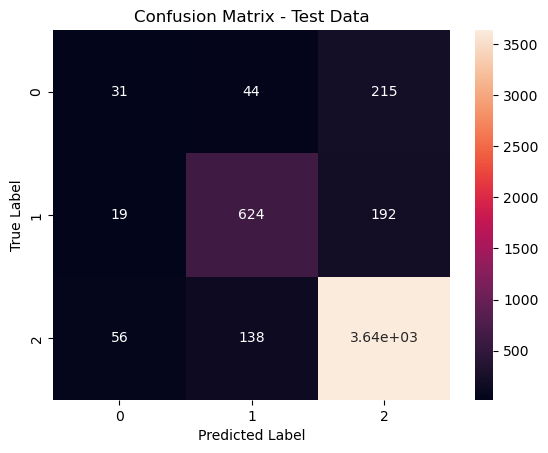

In [217]:
cm=confusion_matrix(Y_test_nb,y_pred_2)
print(cm)
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Pickle

In [218]:
import pickle as pkl

In [219]:
pkl.dump(clf,open('model.pkl','wb'))

In [220]:
pkl.dump(x_lor,open('vec.pkl','wb'))

In [221]:
pkl.dump(tfidf,open('vectorizer.pkl','wb'))

# Testing Data Using LOR

In [222]:
test_data_svm_1 = "I will kill you"
dt1=cv.transform([test_data_svm_1]).toarray()
print(lor.predict(dt1))

['Offensive language detected']


In [223]:
test_data_svm_2 = "Hello "
dt2=cv.transform([test_data_svm_2]).toarray()
print(lor.predict(dt2))

['NO hate and offensive speech']
